In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset,random_split
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch.optim as optim
from NN_class import ConvNeuralNet

# Device configuration

In [2]:
BATCH_SIZE = 64
NUM_CLASSES = 10
LEARNING_RATE = 0.01
EPOCHS_NUM = 20

In [3]:
device = torch.device('cpu')

augmentation_transforms = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.RandomResizedCrop(size=64, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

dataset = ImageFolder(root='C:/Diploma/classification_dataset', transform=augmentation_transforms)

train_size = int(0.85 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

test_dataset.dataset.transform = test_transforms  # Update transform for the test dataset

BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


print(f"Classes: {dataset.classes}")
print(f"Total samples: {len(dataset)}")
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")


Classes: ['1. Eczema 1677', '10. Warts Molluscum and other Viral Infections - 2103', '2. Melanoma 15.75k', '3. Atopic Dermatitis - 1.25k', '4. Basal Cell Carcinoma (BCC) 3323', '5. Melanocytic Nevi (NV) - 7970', '6. Benign Keratosis-like Lesions (BKL) 2624', '7. Psoriasis pictures Lichen Planus and related diseases - 2k', '8. Seborrheic Keratoses and other Benign Tumors - 1.8k', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k']
Total samples: 27153
Training samples: 23080
Testing samples: 4073


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11723403..2.5586283].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4182549..2.2233143].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.5448422].



Displaying first 10 samples from Training Dataset:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99224466..2.281469].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7889158..2.01008].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2848991..2.514088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.378921..2.3590088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3434299..2.129402].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.024918..1.2152987].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8479164..0.9

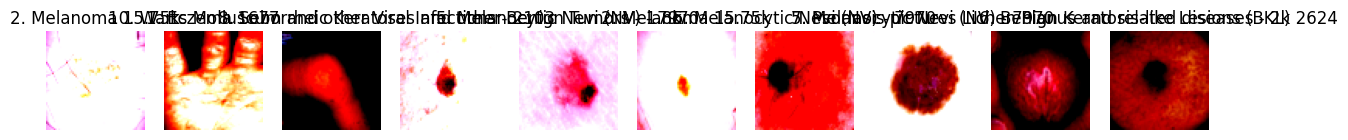

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7102484..2.1879327].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5775534..1.661155].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.3395875..2.2039294].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.08082137..2.65618].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0702858..1.4075212].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..1.2346835].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8085827..


Displaying first 10 samples from Testing Dataset:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19232269..2.1845443].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.398588..1.816231].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1035852..0.8469853].


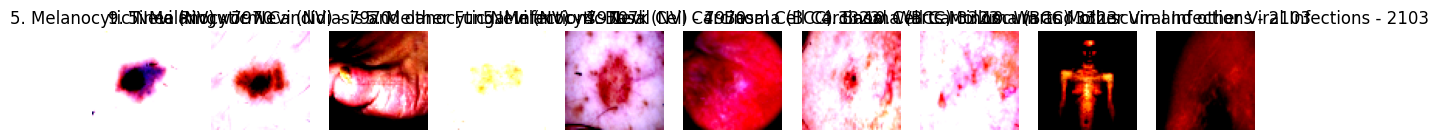

In [4]:
import matplotlib.pyplot as plt

print("\nDisplaying first 10 samples from Training Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = train_dataset[i]  
    class_name = train_dataset.dataset.classes[label]
    
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
    plt.title(class_name)
    plt.axis('off')

plt.show()

print("\nDisplaying first 10 samples from Testing Dataset:")
plt.figure(figsize=(15, 5))

for i in range(10):
    image, label = test_dataset[i]
    class_name = test_dataset.dataset.classes[label]
    
    plt.subplot(1, 10, i + 1)
    plt.imshow(image.permute(1, 2, 0).numpy()) 
    plt.title(class_name)
    plt.axis('off') 

plt.show()

In [5]:
from NN_class import ConvNeuralNet

model = ConvNeuralNet(NUM_CLASSES)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [6]:
for epoch in range(EPOCHS_NUM):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS_NUM, loss.item()))

Epoch [1/20], Loss: 1.1692
Epoch [2/20], Loss: 1.3255
Epoch [3/20], Loss: 1.0770
Epoch [4/20], Loss: 0.8870
Epoch [5/20], Loss: 0.8485
Epoch [6/20], Loss: 0.9436
Epoch [7/20], Loss: 1.1012
Epoch [8/20], Loss: 0.7444
Epoch [9/20], Loss: 0.7355
Epoch [10/20], Loss: 0.7602
Epoch [11/20], Loss: 0.6396
Epoch [12/20], Loss: 0.7436
Epoch [13/20], Loss: 0.6590
Epoch [14/20], Loss: 0.7704
Epoch [15/20], Loss: 0.4795
Epoch [16/20], Loss: 0.3847
Epoch [17/20], Loss: 0.4587
Epoch [18/20], Loss: 0.4806
Epoch [19/20], Loss: 0.8273
Epoch [20/20], Loss: 0.5328


In [7]:
for epoch in range(EPOCHS_NUM):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, EPOCHS_NUM, loss.item()))

Epoch [1/20], Loss: 0.3966
Epoch [2/20], Loss: 0.3145
Epoch [3/20], Loss: 0.5196
Epoch [4/20], Loss: 0.5315
Epoch [5/20], Loss: 0.3835
Epoch [6/20], Loss: 0.2824
Epoch [7/20], Loss: 0.4934
Epoch [8/20], Loss: 0.4234
Epoch [9/20], Loss: 0.3665
Epoch [10/20], Loss: 0.5468
Epoch [11/20], Loss: 0.3599
Epoch [12/20], Loss: 0.4383
Epoch [13/20], Loss: 0.4787
Epoch [14/20], Loss: 0.6178
Epoch [15/20], Loss: 0.3622
Epoch [16/20], Loss: 0.2820
Epoch [17/20], Loss: 0.4886
Epoch [18/20], Loss: 0.3283
Epoch [19/20], Loss: 0.2841
Epoch [20/20], Loss: 0.3778


In [8]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} train images: {} %'.format(len(dataset), 100 * correct / total))

Accuracy of the network on the 27153 train images: 95.05199306759098 %


In [9]:
torch.save(model.state_dict(), "classification_model.pth")
print("Model saved as 'classification_model.pth'")

Model saved as 'classification_model.pth'


In [10]:
model = ConvNeuralNet(num_classes=NUM_CLASSES)
model.load_state_dict(torch.load("classification_model.pth"))
model.eval()

C:\Users\User\AppData\Local\Temp\ipykernel_34464\3048375035.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("classification_model.pth"))

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)